In [94]:
import pickle

import pandas as pd
# import numpy as np


# from datetime import datetime, date
# import datetime as dt
# from datetime import timedelta
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.holtwinters import Holt
# import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

# import seaborn as sns
# sns.set_style()

import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

[nltk_data] Downloading package stopwords to C:\Users\bobkova-
[nltk_data]     ao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
with open('..\\data\\interim\\dataset.pickle', 'rb') as f:
        dataset = pickle.load(f)

In [30]:
dataset

,link,data,file_name,message_content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637,Уважаемые граждане России! Уважаемые депутаты ...


In [31]:
stopwords = stopwords.words("russian")

In [32]:
map_mask = np.array(Image.open("..\\data\\external\\map.jpeg"))

In [33]:
message_content = dataset['message_content'][0]

In [34]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

In [35]:
doc = Doc(message_content)

In [36]:
doc.segment(segmenter) # Сегментация текста
doc.tag_morph(morph_tagger)  # Морфология

In [37]:
# лемматизация
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [38]:
text = []
pos = []
lemma = []
for i in range(len(doc.tokens)):
    text.append(doc.tokens[i].text)
    pos.append(doc.tokens[i].pos)
    lemma.append(doc.tokens[i].lemma)
lemma_df = pd.DataFrame()
lemma_df['text'] = text
lemma_df['pos'] = pos
lemma_df['lemma'] = lemma

In [39]:
lemma_df.head()

,text,pos,lemma
0,Уважаемые,ADJ,уважаемый
1,члены,NOUN,член
2,Совета,PROPN,совет
3,Федерации,PROPN,федерация
4,и,CCONJ,и


In [54]:
print('Доля уникальных лем', len(lemma_df['lemma'].unique())/len(lemma_df))

Доля уникальных лем 0.20830549988866623


In [58]:
len(lemma_df['lemma'].unique())

1871

In [60]:
len(lemma_df)

8982

# Частотность всех слов

In [65]:
grouped = lemma_df.groupby('lemma')
grouped = grouped.count()

In [66]:
grouped.drop(['text', 'pos'], axis=1, inplace=True)
grouped

,freq
lemma,
!,10
(,6
),6
",",872
.,436
...,...
явно,1
ядерный,1
январь,4


0


In [85]:
pos_list = []
for lemma in grouped.index:
    find_pos = lemma_df[lemma_df['lemma']==lemma]['pos']
    if len(find_pos)==0:
        find_pos
    else:
        find_pos = find_pos.iloc[0]
    pos_list.append(find_pos)

In [87]:
grouped['pos'] = pos_list

In [101]:
grouped.sort_values(by=['freq'], inplace=True, ascending=False)

In [102]:
grouped

,freq,pos
lemma,,
",",872,PUNCT
.,436,PUNCT
в,286,ADP
и,277,CCONJ
на,106,ADP
...,...,...
раздельный,1,ADJ
ранее,1,ADV
ранний,1,ADV


In [90]:
grouped.to_dict()['freq']

{'!': 10,
 '(': 6,
 ')': 6,
 ',': 872,
 '.': 436,
 '1': 6,
 '1,16': 1,
 '1,3': 1,
 '1,5': 1,
 '1,7': 1,
 '11': 2,
 '111': 1,
 '112': 1,
 '147': 1,
 '150': 1,
 '16': 1,
 '177,3': 1,
 '19': 1,
 '1943': 1,
 '1991': 1,
 '1993': 1,
 '1999-м': 1,
 '20': 1,
 '2000': 2,
 '2000-ха': 1,
 '2006': 1,
 '2010': 1,
 '2012': 1,
 '2018–2019': 1,
 '2019': 1,
 '2020': 5,
 '2020-го': 1,
 '2021': 8,
 '2023': 1,
 '2024': 3,
 '2026': 1,
 '21': 1,
 '210-ю': 1,
 '25': 2,
 '255': 1,
 '3,5': 1,
 '300': 1,
 '31': 3,
 '37,5': 1,
 '40': 1,
 '450': 1,
 '466': 1,
 '5,5': 2,
 '550': 1,
 '6': 1,
 '616': 2,
 '617': 3,
 '7': 1,
 '70': 1,
 '70–80': 1,
 '73': 1,
 '75': 2,
 '75-летие': 1,
 '77,7': 1,
 '78': 1,
 '8': 1,
 '80': 1,
 '9': 1,
 '90': 1,
 '90-ха': 1,
 '90-хий': 1,
 ':': 33,
 '?': 13,
 'o': 2,
 'xxi': 2,
 '«': 9,
 '»': 9,
 'а': 40,
 'абсолютно': 1,
 'абстрактный': 1,
 'австрия': 1,
 'автоматически': 1,
 'автомобильный': 1,
 'авторитет': 1,
 'автотрасса': 1,
 'акт': 1,
 'активность': 1,
 'активный': 3,
 'амбициозный

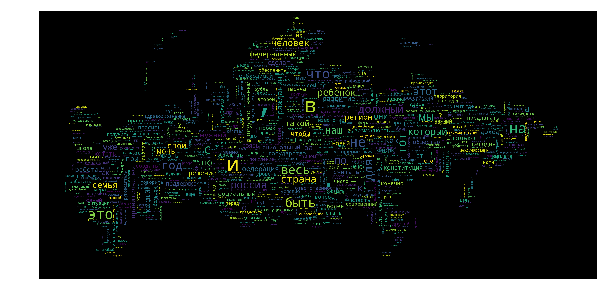

In [98]:
wordcloud = WordCloud(stopwords=stopwords,
                          background_color="black",
                          width=2000, # Width of the canvas
                          height=2000, # Height of the canvas
                          max_words=1000,
                          mask=map_mask, # gives a binary mask on where to draw words
                          contour_width=1, # If mask is not None and contour_width > 0, draw the mask contour.
                          contour_color='black', # Mask contour color
                          max_font_size=200,
                          min_font_size=1).generate_from_frequencies(grouped.to_dict()['freq'])
# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();
plt.imshow(wordcloud)
wordcloud.to_file('..\\reports\\figures\\frequencies-map-wordcloud-1.png')

# Существтельные

In [60]:
lemma_df_noun = lemma_df[lemma_df['pos']=='NOUN']
lemma_df_noun.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:10]

,lemma,freq
312,что,90
602,год,66
5259,страна,49
2167,ребенок,43
2118,человек,42
1901,семья,36
5874,гражданин,31
3369,регион,29
2459,развитие,23
4167,система,22


# Прилагательные

In [62]:
lemma_df_adj = lemma_df[lemma_df['pos']=='ADJ']
lemma_df_adj.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:10]

,lemma,freq
2753,должный,58
741,наш,47
5341,нужный,26
7428,федеральный,24
6943,государственный,21
1405,социальный,19
3445,новый,18
5929,национальный,17
2275,необходимый,16
6074,самый,15


# Глаголы

In [63]:
lemma_df_verb = lemma_df[lemma_df['pos']=='VERB']
lemma_df_verb.sort_values(by='freq', ascending=False)[['lemma','freq']].drop_duplicates()[:10]

,lemma,freq
2228,быть,83
7345,мочь,29
1999,сделать,20
8745,считать,19
6507,хотеть,18
6071,создать,15
4564,стать,15
4395,просить,14
3298,предлагать,14
2310,сказать,13
